In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import Imputer, scale, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import ElasticNet

# Variables Categóricas

Por defecto scikit-learn no acepta variables categóricas. Para poder trabajar con estas variables necesitamos codificar estas variables en valores numéricos. Por ejemplo podemos convertir las variables a tipo dummy, es decir, dar un valor 0 para el caso en el cual no aparece la variable y darle un 1 en el caso que si aparece. Por ejemplo supongamos un dataset que tenemos una característica ciudad que tienes los valores Granada, Madrid, Barcelona. Podriamos crearnos una nueva columna llamada Barcelona y que valga 1 en las observaciones donde una observación tenga por valor Barcelona y que valga 0 en el caso que la observación no tome este valor. Estas son las denominadas variables tipo dummy. En el dataset gm_2008_region.csv tenía una columna llamada region que fue eliminada, a continuación vamos a proceder a trabajar con esta.

En primer lugar vamos a proceder a explorar esta columna

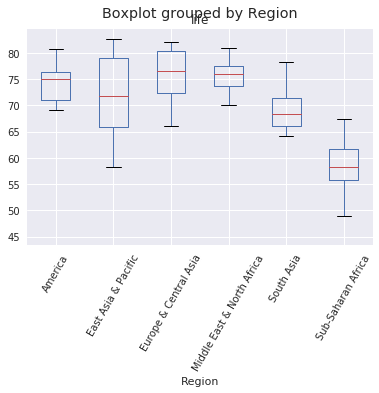

In [2]:
sns.set()
#Lectura de datos
df = pd.read_csv('gm_2008_region.csv')
#Creamos el boxplot
df.boxplot('life', 'Region', rot = 60)
#Mostramos los resultados
plt.show()

Esta claro que esta variable puede ser una variable muy importante a la hora de predecir la esperanza de vida, puesto que scikit-learn no permite el uso de variables categóricas vamos a proceder a transformar esta variable a una variable tipo dummy.

In [3]:
#Pasamos la variable region a tipo dummy
df_region = pd.get_dummies(df)
#Mostramos las nuevas columnas
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')


En caso de que queramos eliminar variables dummy innecesarias podemos hacer uso del parámetro drop_first asignándole el valor True, que nos eliminará la primera variable dummy realizada.

In [4]:
#Eliminamos variables dummy innecesarias
df_region = pd.get_dummies(df, drop_first = True)
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


Ahora que tenemos la variable region en disposición para poder usarla en nuestro modelo vamos a proceder a hacer uso del regresor Ridge.

In [5]:
#Obtenemos los datos
x = df_region.drop('life', axis = 1).values
y = df_region['life'].values
#Creamos nuestro regresor ridge
ridge = Ridge(alpha = 0.5, normalize = True)
#Cremos un 5-fold
ridge_cv = cross_val_score(ridge, x, y, cv = 5)
print(ridge_cv)

[ 0.86808336  0.80623545  0.84004203  0.7754344   0.87503712]


# Missing Values

Como científicos de datos en la mayoría de las ocasiones nos enfrentaremos a situaciones en las que para ciertas observaciones, ciertas características tengan valores perdidos, estos valores perdidos pueden ir codificados de diversas formas (9999, NaN, ?, 0, etc). Para tratar de una forma más eficaz y sencilla lo mejor es que todos los valores perdidos estén representados como NaN, ya que scikit-learn dispone de metodos como fillna(), dropna() así como Imputer.

In [6]:
#Leemos los datos
df = pd.read_csv('house-votes-84-missingvalues.csv')
colnames = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 
            'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports',
           'eaa_rsa']
df.columns = colnames
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republica0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
1,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
2,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
3,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1


En este caso nuestros valores perdidos están indicados por el signo de interrogación, el primer paso para imputar estos valores de forma eficiente es pasarlos a NaN.

In [7]:
#Cambiamos los signos de interrogación por NaN
df[df == '?'] = np.nan
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republica0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,NaN
1,democrat,NaN,1,1,NaN,1,1,0,0,0,0,1,0,1,1,0,0
2,democrat,0,1,1,0,NaN,1,0,0,0,0,1,0,1,0,0,1
3,democrat,1,1,1,0,1,1,0,0,0,0,1,NaN,1,1,1,1
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1


In [8]:
#Mostramos el número de valores perdidos
print(df.isnull().sum())

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              20
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64


In [9]:
#Mostramos el tamaño del dataset original
print('Dim dataset original: {}'.format(df.shape))

Dim dataset original: (434, 17)


In [10]:
#Hacemos uso de dropna() que nos eliminará todas las observaciones que tenga 1 o más características con valor NaN
df_dropna = df.dropna()
print('Dim dataset tras hacer uso de dropna:{}'.format(df_dropna.shape))

Dim dataset tras hacer uso de dropna:(232, 17)


Podemos ver que en total disponemos de un total de 232 observaciones completas, es decir, esto son observaciones de calidad. A la hora imputar valores es mejor seguir algún tipo de estrategia. Es en este caso donde tener un amplio conocimiento sobre nuestros datos es realmente útil, pero en caso de ausencia de conocimiento podemos imputar los valores perdidos por la media, mediana.

Como ya hemos visto a los de crear un modelo tenemos que seguir una gran cantidad de pasos, desde crear nuestro modelo de train y test, fijar el clasificador o regresor, realizar un tuning de parámetros, evaluar nuestro modelo. El proceso de imputar valores debería ser el primer paso en la construcción de nuestro modelo. Scikit-learn dispone de un constructor (pipeline) que nos permite unir todos estos pasos en un solo proceso y simplificar de esta forma el flujo de trabajo. Ahora vamos a prácticar el pipeline con dos pasos: imputación y fijación del modelo. Hasta ahora hemos visto un total de 3 clasificadores: K-NN, regresión logística y árboles de decisión. En este ejercicio vamos a introducir un 4, SVM (Support Vector Machines).

In [11]:
#Nos creamos nuestra transformación para imputar
imp = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
#Fijamos el clasificador
clf = SVC()
#Configuramos los pasos de pipeline
steps = [('imputation', imp),
        ('SVM', clf)]

Ahora que tenemos el pipeline creado, simplemente podemos hacer uso de los métodos fit y predict tal y como lo hacíamos anteriormente.

In [12]:
#Nos creamos el pipeline
pipeline = Pipeline(steps)
#Dividimos en train y test
x = df.drop('party', axis = 1).values
y = df['party'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
#Fijamos el pipeline
pipeline.fit(x_train, y_train)
#Predecimos 
y_pred = pipeline.predict(x_test)
#Computamos las métricas
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

   democrat       1.00      0.93      0.96        83
 republica0       0.89      1.00      0.94        48

avg / total       0.96      0.95      0.95       131



# Centering and Scaling data

Existen una gran cantidad de  modelos que hacen uso de la medida de la distancia para tomar decisiones, por ejemplo el clasificador k-NN hace uso de las distancias para decidir que grupo asigna a una nueva instancia. Si tenemos características que tienen un amplio margen de valores pueden influir excesivamente en el modelo, es por esto que en estas situaciones lo mejor es escalar todas las variables de forma que se encuentren en escalas similares. Tenemos diversas formas de hacer esto: por ejemplo, podemos restar la media y dividir entre la varianza (todas los valores están centrados entorno a cero y tienen varianza uno), podemos restar el mínimo y dividir por el rango de esta forma todas las variables se encontrarán en el intervalo (0,1) o podemos normalizar los datos en el rango (-1,1). A continuación vamos a trabajar con la base de datos white-wine.csv

In [14]:
#Cargamos los datos
df = pd.read_csv('white-wine.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Podemos ver que tenemos variables que se mueven en un rango elevado por ejemplo free sulfur dioxide va desde un mínimo  de 9 a un máximo de 440. Además vamos a crearnos con la columna quatility un array booleana que será true si su valor es menor qu 5 en caso contrario sera False.

In [19]:
#Separamos variable a predecir del resto
x = df.drop('quality', axis = 1).values
y = df['quality'].values
y = y < 5
#Escalamos las características
x_scaled = scale(x)
#Mostramos la media y la desviación estándar de nuestras variables antes de escalar
print('Media de las variables antes de ser escaladas: {}'.format(np.mean(x)))
print('Desviación estándar de las variables antes de ser escaladas: {}'.format(np.std(x)))
#Mostramos la media y la desviación estándar de las variables tras ser escaladas
print('Media de las variables después de ser escaladas: {}'.format(np.mean(x_scaled)))
print('Desviación estándar de las variables después de ser escaladas: {}'.format(np.std(x_scaled)))

Media de las variables antes de ser escaladas: 18.432687072460002
Desviación estándar de las variables antes de ser escaladas: 41.54494764094571
Media de las variables después de ser escaladas: 2.7314972981668206e-15
Desviación estándar de las variables después de ser escaladas: 0.9999999999999999


Para comprobar si escalar nuestras variables es efectivo necesitamos ejecutar nuestro algoritmo con y sin escalar. Para ello vamos hacer uso de k-NN con las variables escaladas y sin escalar para ver si mejor o no los resultados.

In [25]:
#Fijamos los pasos del pipeline
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

#Nos creamos el pipeline
pipeline = Pipeline(steps)

#Dividimos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Fijamos el pipeline para los datos escalados
knn_scaled = pipeline.fit(x_train, y_train)

#Fijamos el modelo para los datos sin escarlar
knn_unscaled = KNeighborsClassifier().fit(x_train, y_train)

#Mostramos los resultados escalando y sin escalar
print('Precisión con los datos escalados: {}'.format(knn_scaled.score(x_test, y_test)))
print('Precisión con los datos sin escalar: {}'.format(knn_unscaled.score(x_test, y_test)))

Precisión con los datos escalados: 0.964625850340136
Precisión con los datos sin escalar: 0.9666666666666667


A continuación vamos a poner junto todo lo aprendido,vamos a hacer uso de SVM para clasificar vinos, para ello vamos a proceder a realizar un tunning de los parámetros C y gamma. El parámetro C nos controla la fuerza de la regularización y gamma controla el coeficiente de los kernels.

In [29]:
#Fijamos los pasos de pipeline
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]
#Nos creamos el pipeline
pipeline = Pipeline(steps)
#Fijamos el tunning de parámetros
parameters = {'SVM__C': [1, 10, 100],
             'SVM__gamma': [0.1, 0.01]}
#Separamos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 21)

#Ejecutamos el tuning de parámetros con un 3-fold
cv = GridSearchCV(pipeline, parameters, cv = 3)

#Fijamos nuestro cv
cv.fit(x_train, y_train)

#Predecimos
y_pred = cv.predict(x_test)

#Calculamos y mostramos las distintas métricas
print('Accuracy: {}'.format(cv.score(x_test, y_test)))
print(classification_report(y_test, y_pred))
print('Tuned model parameters: {}'.format(cv.best_params_))

Accuracy: 0.9693877551020408
             precision    recall  f1-score   support

      False       0.97      1.00      0.98       951
       True       0.43      0.10      0.17        29

avg / total       0.96      0.97      0.96       980

Tuned model parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


Para finalizar vamos a retornar al conjunto de datos gapminder, para ello vamos a proceder a realizar la imputación de valores, el escalado y la aplicación del modelo ElasticNet haciendo uso de pipeline.

In [37]:
#Cargamos los datos
df = pd.read_csv('gm_2008_region.csv')
df = pd.get_dummies(df)
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0,0


In [41]:
#Separamos las características de la variable a predecir
x = df.drop('life', axis = 1).values
y = df['life'].values

#Nos creamos los pasos del pipeline
steps = [('imputer', Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
#Nos creamos el tunning de parámetros
parameters = {'elasticnet__l1_ratio': np.linspace(0, 1, 30)}
#Fijamos el pipeline
pipeline = Pipeline(steps)

#Dividimos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

#Hacemos un 3-fold
gm_cv = GridSearchCV(pipeline, parameters, cv = 3)

#Fijamos el pipeline
gm_cv.fit(x_train, y_train)

#Obtenemos las medidas
r2 = gm_cv.score(x_test, y_test)
print('Tuned elasticnet R2: {}'.format(r2))
print('Best parameters: {}'.format(gm_cv.best_params_))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Tuned elasticnet R2: 0.8862016549771037
Best parameters: {'elasticnet__l1_ratio': 1.0}
